# Project: Investigate TMDb movie data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Investigating a movie dataset using Numpy, Pandas and Matplotlib. I've watched many movies in my life, I'm familiar
with the industry. I know how much of an impact the industry have on us. We can gain a lot of knowledge by investigating
such a dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load the data and display it
df = pd.read_csv('E:/data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# display some information about data rows and it's types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# check the number of duplicates
df.duplicated().sum()

1

In [5]:
# filter dataset by duplicated row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [6]:
# filter by the duplicated rows
df.query('original_title == "TEKKEN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
# check the number of unique value in the dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# check the number of missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning
1. Dropping the columns I won't be using in the investigation of the dataset.

In [9]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'runtime','production_companies'],axis=1, inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


2. Dropping duplicated rows from the dateset

In [10]:
df.drop_duplicates(inplace=True)
# check the number of duplicates
df.duplicated().sum()

0

In [11]:
# check the new shape of the dataframe
df.shape

(10865, 13)

In [12]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


3. Dropping missing values as their types are 'objects' as I won't be able to fill them.

In [13]:
df.dropna(inplace=True)

In [14]:
# check for the missing value, should be False
df.isnull().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
cast              False
director          False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [15]:
# display the dataset info again
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


4. Split the movie genres and stacking them using the ID as an index

In [16]:
# set the 'id' column as index
df = df.set_index('id')
df

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00


In [17]:
# filter by genre and then separate them
genres_df = df['genres'].str.split('|', expand=True)
genres_df

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None
...,...,...,...,...,...
21,Documentary,None,None,None,None
20379,Action,Adventure,Drama,None,None
39768,Mystery,Comedy,None,None,None


In [18]:
# stack the Series and then convert it to DataFrame
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [19]:
# rename the column and display the count of each genre
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df['genres_adj'].value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

<a id='eda'></a>
## Research Questions
### Q1: What are the top 15 movie ratings?

In [20]:
# check the 15 largest Vote Average
df.vote_average.nlargest(15)

id
125336    9.2
374430    8.8
24970     8.7
68450     8.5
55676     8.5
25093     8.5
16275     8.5
321640    8.4
41120     8.4
278       8.4
241287    8.4
242575    8.4
24128     8.4
34505     8.4
26360     8.4
Name: vote_average, dtype: float64

In [21]:
# filter by the resulted Vote Average
highest_rate = df.query('vote_average >= 8.4')
highest_rate

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
321640,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,Documentary,72,8.4,2015,0.000000e+00,0.000000e+00
374430,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,0.000000e+00,0.000000e+00
41120,0.145026,0,0,Rush: Beyond the Lighted Stage,Sebastian Bach|Jack Black|Jimmy Chamberlin|Ged...,Sam Dunn|Scot McFadyen,Documentary|Music,14,8.4,2010,0.000000e+00,0.000000e+00
68450,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,Adventure|Documentary,60,8.5,2011,0.000000e+00,0.000000e+00
125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,Documentary,14,9.2,2011,0.000000e+00,0.000000e+00
278,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Drama|Crime,5754,8.4,1994,3.677779e+07,4.169346e+07
241287,0.107333,0,0,Tropico,Lana Del Rey|Shaun Ross,Anthony Mandler,Music|Drama|Fantasy|Romance,24,8.4,2013,0.000000e+00,0.000000e+00
242575,0.054380,4000000,0,"Guten Tag, RamÃ³n",Adriana Barraza|RÃ¼diger Evers|Hector Kotsifak...,Jorge RamÃ­rez SuÃ¡rez,Drama,11,8.4,2013,3.744133e+06,0.000000e+00
24970,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,Music,23,8.7,2006,0.000000e+00,0.000000e+00


This bar plot visualizes the move titles that scored the highest average movie ratings.

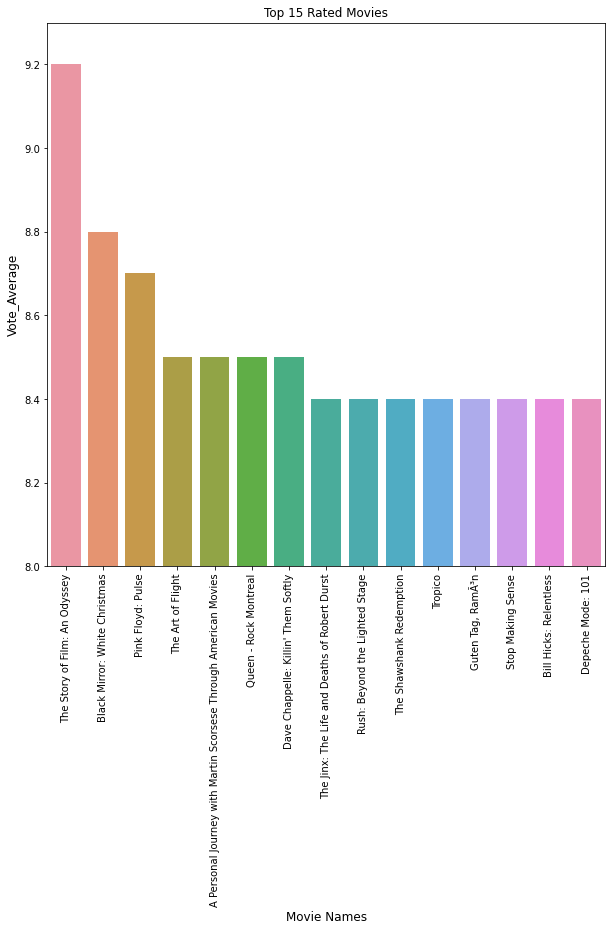

In [22]:
# create a bar to visualize results
plt.figure(figsize=(10,10))
sns.barplot(data=highest_rate.sort_values('vote_average',ascending=False), x='original_title', y='vote_average')
plt.xticks(rotation=90)
plt.ylim(8, 9.3);
plt.title('Top 15 Rated Movies',fontsize=12)
plt.xlabel('Movie Names',fontsize=12)
plt.ylabel('Vote_Average',fontsize=12);

It's obvious that 'The Story of Film: An Odyssey scored the highest average movie rating with a value of 9.2.

### Q2: What are the highest produced genres?

This bar plot visualize the highest produced movie genres as it consists of the count of each movie genre on Y-axis and
the actual genres on X-axis.

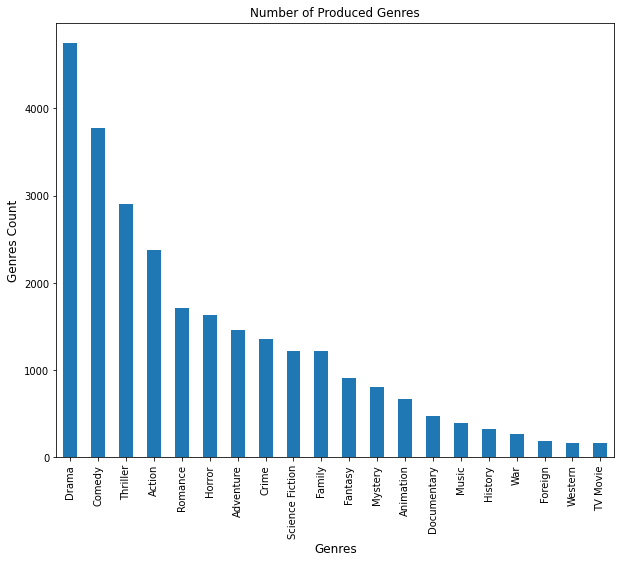

In [23]:
# get the count of each genre produced.
genre_counts = genres_df['genres_adj'].value_counts()
# create a barplot to visualize the results
genre_counts.plot(kind='bar', figsize=(10,8))
plt.title('Number of Produced Genres', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Genres Count', fontsize=12);

This obviously concludes that the two highest produced movie genres are Drama and Comedy.

### Q3: Which movies have got the highest revenues?

In [24]:
# get the 10 largest revenues
df['revenue'].nlargest(10)
# filter the dataframe with them
highest_revenue = df.query('revenue >= 1215439994')

This bar plot visualizes the movies that generated the highest revenues with movie names on the X-axis and Revenues on
the Y-axis.

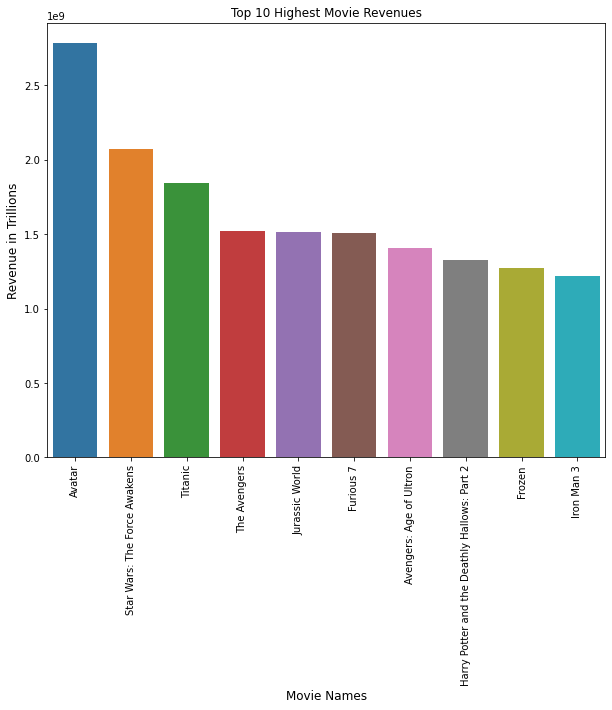

In [25]:
# create a bar to visualize the results
plt.figure(figsize=(10,8))
sns.barplot(data=highest_revenue.sort_values('revenue',ascending=False), x='original_title', y='revenue')
plt.xticks(rotation=90)
plt.title('Top 10 Highest Movie Revenues')
plt.xlabel('Movie Names', fontsize=12)
plt.ylabel('Revenue in Trillions',fontsize=12);

It's clear that Avatar generated the highest revenue and it's followed by Star Wars.

### Q4: What are the highest movie budgets?

In [26]:
# get the largest movies budgets
df['budget'].nlargest(10)
# filter the dataframe by budget
highest_budget = df.query('budget >= 250000000')

This bar plot visualizes the highest movie budget with Movie Title on X-axis and Budget on Y-axis.

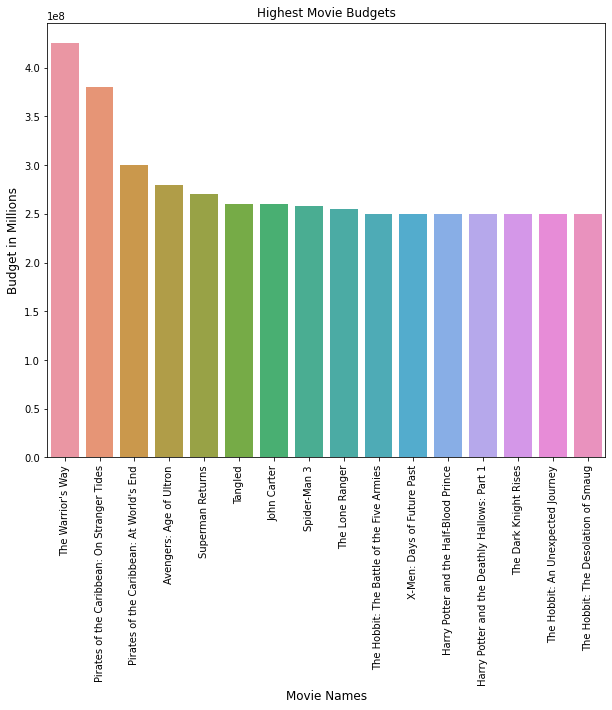

In [27]:
# create bar to visualize the results
plt.figure(figsize=(10,8))
sns.barplot(data=highest_budget.sort_values('budget',ascending=False), x='original_title', y='budget')
plt.xticks(rotation=90)
plt.title('Highest Movie Budgets', fontsize=12)
plt.xlabel('Movie Names', fontsize=12)
plt.ylabel('Budget in Millions', fontsize=12);

it's clear that The Warrior's Way has the highest budget and Pirates of the Caribbean has the second highest budget.

### Q5: What is the correlation between revenues and budget?

In [28]:
# correlation between revenue and budge
df['revenue'].corr(df['budget'])

0.7344873624052347

This scatter plot visualizes the correlation between Budget and Revenues in order to show whether they increase with the
same rate or not.

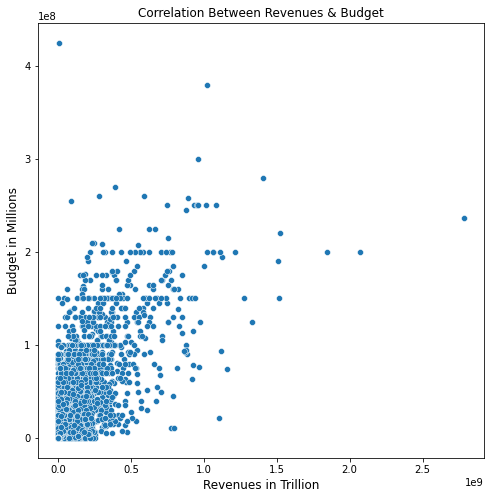

In [29]:
# create a scatter to visualize the correlation
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='revenue', y='budget')
plt.title('Correlation Between Revenues & Budget')
plt.xlabel('Revenues in Trillion', fontsize=12)
plt.ylabel('Budget in Millions', fontsize=12);

The scatter has a moderate correlation, a positive relationship with some outliers that almost has no effect on the
dataset.

### Q6: What is the correlation between Vote Counts And Vote Average?

In [30]:
# correlation between vote count and vote average
df['vote_count'].corr(df['vote_average'])

0.26055369051618305

This scatter plot visualizes the correlation between Vote Counts and Vote Average to indicate whether they increase with
the same rate or not.

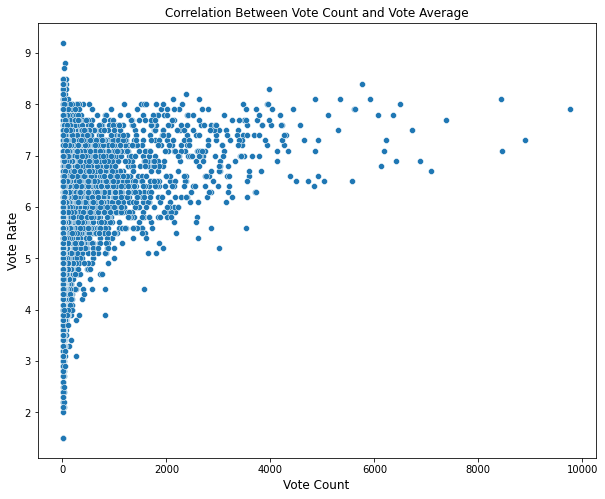

In [31]:
# create a scatter to visualize the correlation
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='vote_count', y='vote_average')
plt.title('Correlation Between Vote Count and Vote Average', fontsize=12)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Vote Rate', fontsize=12);

This scatter shows that Vote Counts and Average has a weak correlation with outliers that doesn't necessarily affect the
visualization.

### Q7: What is the correlation between Vote Count and Popularity?

In [32]:
# correlation between Vote Count and Popularity
df['vote_count'].corr(df['popularity'])

0.8006187445347112

This scatter plot visualizes the correlation between Vote Count and Popularity to indicated whether they increase by the
same rate or not.

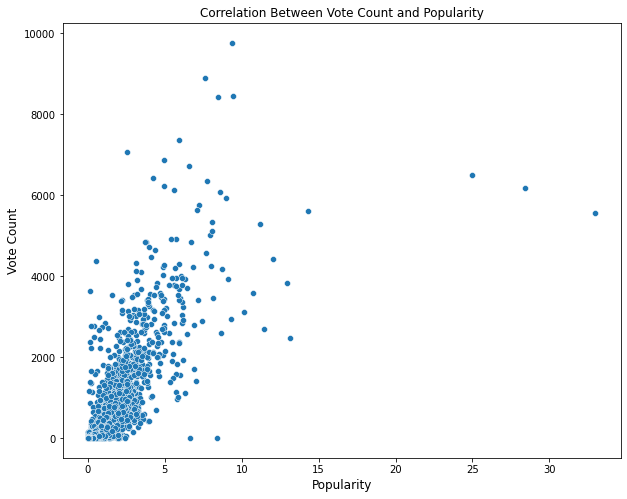

In [33]:
# Create a scatter to cisualize the correlation
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='popularity', y='vote_count')
plt.title('Correlation Between Vote Count and Popularity', fontsize=12)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Vote Count', fontsize=12);

This scatter indicates that Vote Count and Popularity has a strong correlation and a positive relationship with 2 or
more outliers.

### Q8: What is the average revenue per year?


In [34]:
# this is the average revenue
df['revenue'].mean()

40319887.588016026

In [35]:
df.groupby('release_year')['revenue'].mean()


release_year
1960    4.531406e+06
1961    1.089420e+07
1962    6.736870e+06
1963    5.511911e+06
1964    8.118614e+06
1965    1.308805e+07
1966    1.842102e+06
1967    1.941670e+07
1968    6.966657e+06
1969    8.131903e+06
1970    1.400555e+07
1971    7.362011e+06
1972    1.236825e+07
1973    2.225420e+07
1974    1.766391e+07
1975    2.176114e+07
1976    1.704267e+07
1977    3.893898e+07
1978    2.107353e+07
1979    2.955781e+07
1980    2.267516e+07
1981    2.164154e+07
1982    3.035116e+07
1983    2.884412e+07
1984    2.534158e+07
1985    2.662752e+07
1986    2.502315e+07
1987    2.792020e+07
1988    2.633072e+07
1989    3.825869e+07
1990    4.026641e+07
1991    3.538797e+07
1992    4.604662e+07
1993    3.929464e+07
1994    3.856212e+07
1995    5.262265e+07
1996    4.094331e+07
1997    5.578625e+07
1998    4.520559e+07
1999    5.069515e+07
2000    4.901206e+07
2001    5.564350e+07
2002    5.546820e+07
2003    5.387275e+07
2004    5.470301e+07
2005    4.575301e+07
2006    4.028648e+07


This bar plot visualizes the highest average revenues produced in a year with Years on X-axis and Average Revenues on
Y-axis.

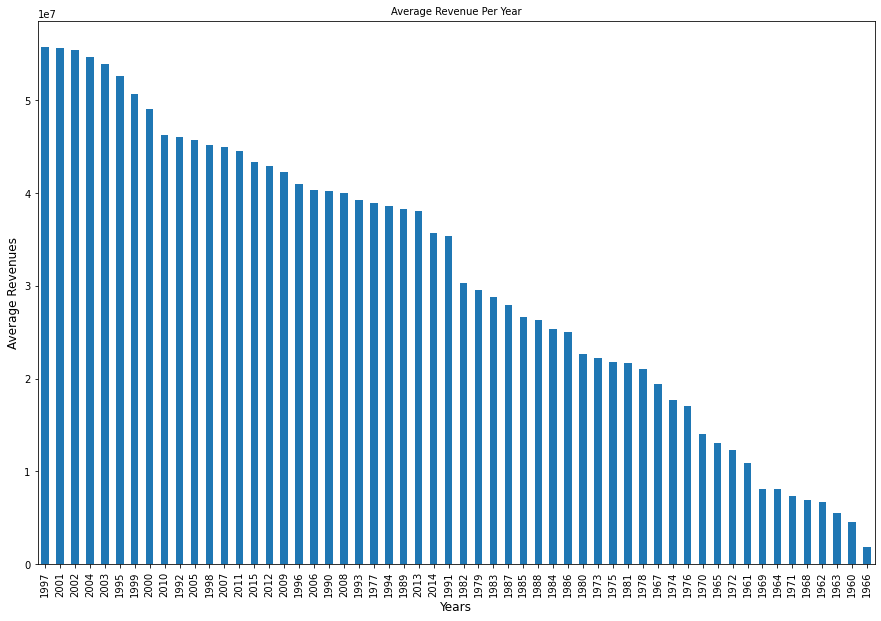

In [36]:
# Get the mean of revenue
average_revenue = df.groupby('release_year')['revenue'].mean()
# Create a bar to visualize the results
average_revenue.sort_values(ascending=False).plot(kind='bar',figsize=(15,10))
plt.title('Average Revenue Per Year', fontsize=10)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Revenues', fontsize=12);

It indicates that the highest year is 1997 and is followed by 2001 and 2002.

### Q9: What are the yearly produced movie genres?

In [37]:
# Create a new dataframe and merge the original dataframe on the id of genres df
new_df = df.merge(genres_df, how='right', on='id')
# Drop the old genre column from the dataframe
new_df.drop('genres', axis=1, inplace=True)
# Get the counts of the movie genres
new_df.genres_adj.value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

This box blot is used to visualize genres produced each year with years on X-axis and Genres on Y-axis.

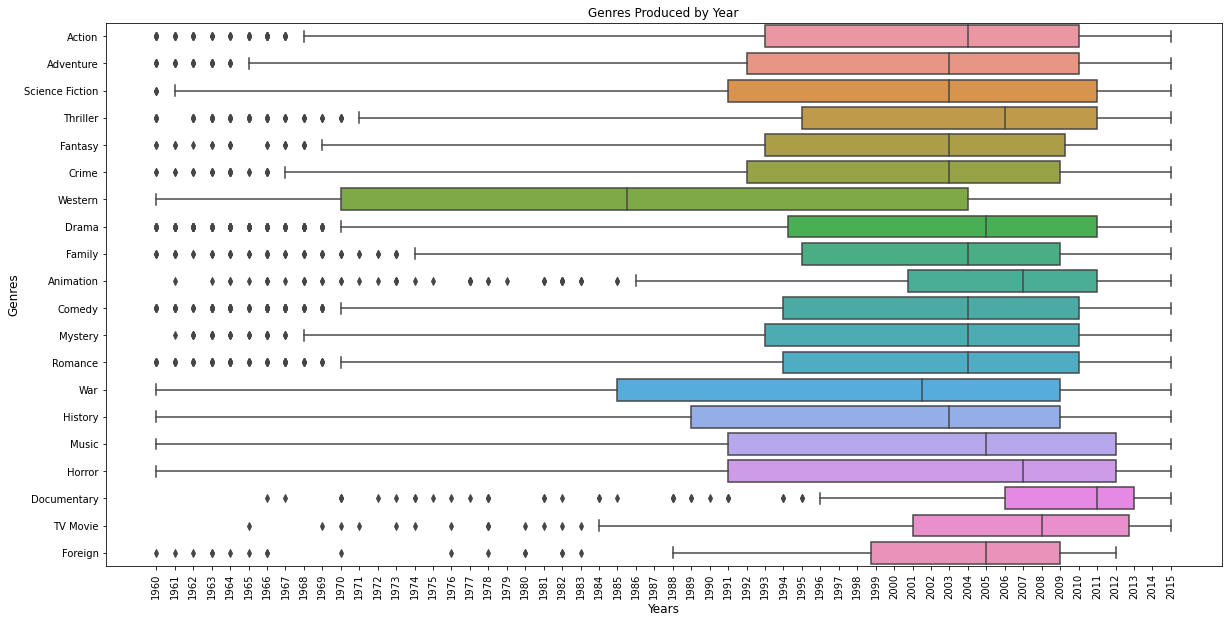

In [38]:
# Create a box to visualize the results
plt.figure(figsize=(20,10))
sns.boxplot(data=new_df, x='release_year', y='genres_adj')
plt.xticks(average_revenue.index,rotation=90)
plt.title('Genres Produced by Year', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.xlabel('Years', fontsize=12);

It produces the 5 Number Summary(min, max, Q1, median, Q3), min is when a certain genre was first produced, max is the last
year that this genre was produced. An example of that is Action, people didn't recognize action movies that much in 1960
but they did in 1968 which is the min of Action genre and 2015 is the max of it. Removing outliers would make the date
much clearer.

### Q10: What is average popularity per movie genres?

In [39]:
most_popular = new_df.groupby('genres_adj')['popularity'].mean()
most_popular

genres_adj
Action             0.929040
Adventure          1.158480
Animation          0.885913
Comedy             0.594795
Crime              0.745331
Documentary        0.188172
Drama              0.592844
Family             0.794195
Fantasy            1.000166
Foreign            0.191552
History            0.582103
Horror             0.465370
Music              0.495123
Mystery            0.691137
Romance            0.593143
Science Fiction    1.007173
TV Movie           0.272252
Thriller           0.742534
War                0.732346
Western            0.594216
Name: popularity, dtype: float64

This bar plot visualize the average popularity per genre.

c:\users\007\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


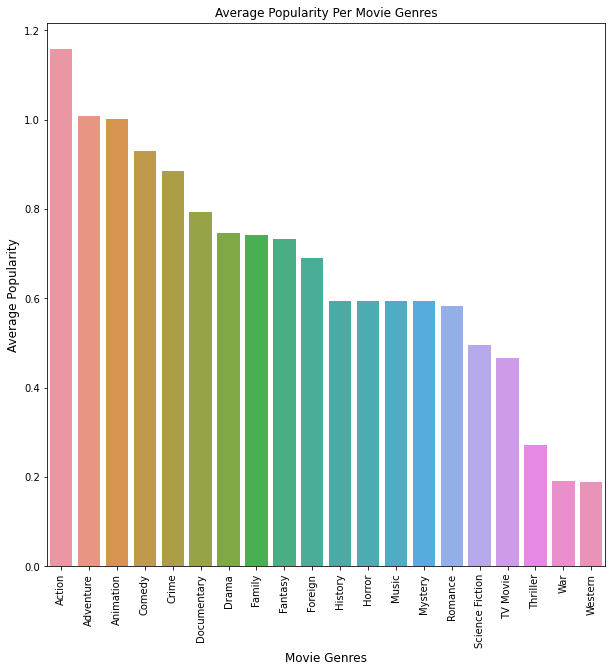

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(most_popular.index, most_popular.sort_values(ascending=False))
plt.title('Average Popularity Per Movie Genres', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xlabel('Movie Genres', fontsize=12)
plt.xticks(rotation=90);

it indicates that Action has the highest average popularity, it's followed by Adventure even though Drama was produced
the most.

### Q11: What are the most profitable movie genres?

In [41]:
# Get the total revenue
most_profitable = new_df.groupby('genres_adj')['revenue'].sum()
most_profitable

genres_adj
Action             173542641094
Adventure          166425793633
Animation           52603987494
Comedy             142326036180
Crime               57367167868
Documentary          1025863469
Drama              139133934703
Family              89165240116
Fantasy             88223309887
Foreign               274846449
History             10691938934
Horror              27538937718
Music               11656679074
Mystery             32576228996
Romance             61093656624
Science Fiction     86202745824
TV Movie               42000000
Thriller           121304496492
War                 12853399491
Western              4713837032
Name: revenue, dtype: int64

This bar plot is associated with visualizing the highest revenue per genre, it has Movie Genres on X-axis and
Total Revenue on Y-axis.


c:\users\007\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


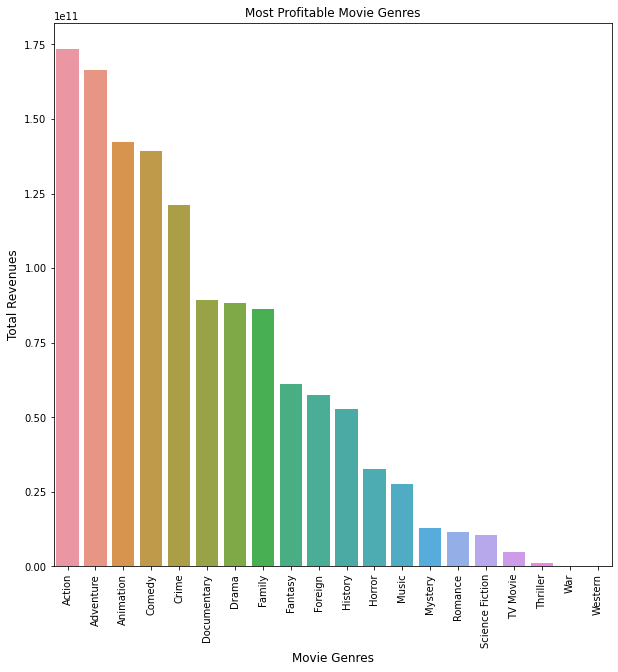

In [42]:
#create a bar to visualize the results
plt.figure(figsize=(10,10))
sns.barplot(most_profitable.index, most_profitable.sort_values(ascending=False))
plt.title('Most Profitable Movie Genres', fontsize=12)
plt.ylabel('Total Revenues', fontsize=12)
plt.xlabel('Movie Genres', fontsize=12)
plt.xticks(rotation=90);

it implies that Action has the highest revenue, it's followed by Adventure even though Drama was the highest produced
genre.

### Q12: Who are the directors with the highest movie directed?

The bar plot visualizes the Director with the highest number of movie directed

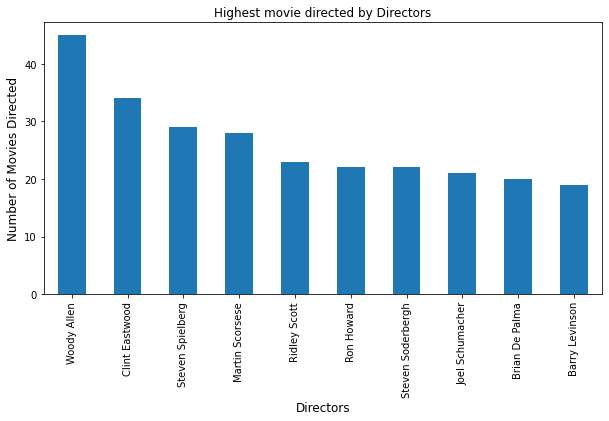

In [43]:
# Get the counts of directors
directors = df['director'].value_counts()
# Create a bar with the largest 10 movie directors regarding directed movies
directors.nlargest(10).plot(kind='bar',figsize=(10,5))
plt.title('Highest movie directed by Directors', fontsize=12)
plt.xlabel('Directors', fontsize=12)
plt.ylabel('Number of Movies Directed', fontsize=12);

it indicates that Woody Allen has directed the highest number of movie and is followed by Clint Eastwood.

<a id='conclusions'></a>
## Conclusions
After cleaning the dataset, I've made some statistical analysis on the dataset and here are some of the conclusion I've
came through:

1. The highest rated movie based on the Average Votes is ---> The Story of Film: An Odyssey.

2. The two highest made genres are ---> Dramas then Comedy.

3. The movie with the highest ever revenue made is ---> Avatar with 2781505847$.

4. The movie with the highest ever budget it ---> The Warrior's Way with 425000000$.

5. The correlation between Revenues and Budget is a moderate correlation with a value of ---> 0.73.

6. The correlation between Vote Count and Vote Average is a weak correlation with a value of ---> 0.26.

7. The correlation between Vote Count and Popularity is a strong correlation with a value of ---> 0.80.

8. The Average revenue per year is 40319887.588$.

9. The box plot makes the year when a genre started and ended clear and readable.

10. The movie genre with the highest average popularity is Action even though Drama is the most produced genre. It
implies that the number of times a genre is produced doesn't necessarily affect it's popularity.

11. The movie genre with the highest total revenue is Action even though Drama is the most produced genre which means
people tend to enjoy Action movies rather than enjoying Drama movies.

12. The director with the highest no. of movies directed is Woody Allen with 45 movies.

## Limitations
After inspecting the dataset, the analysis I did was exposed to some limitaions. Some of them are:

1. There was some missing values in the dataset that forced me to remove whole rows to make the dataset clean.
These rows could have provided us with some insightful information.

2. Writers and Composers are one of the most important crew members that contributes to the creation of the movie and
the dataset have mentioned nothing about them.

3. It would be useful if we involved awards like 'Oscars' in the dataset as the awards are an international recognition
of excellence in cinematic achievements.

4. Including a Metacritic score in the dataset would've been a useful point of information as it's based on the score of
the reviewer.
